In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [2]:
class AlgorithmsDS:
    """ML algorithms."""

    def __init__(self, n_features, data, target):
        """Constructor."""

        self.weights = np.zeros(n_features).reshape(n_features, 1)
        self.data = data
        self.target = target.reshape(target.shape[0], 1)
        self.errors = list()
        self.w_list = [self.weights.copy()]

    def gradient_descent(self, eta=1e-02, max_iter=1e04, min_weight_dist=1e-08):
        """Gradient descent algorithm."""

        iter_num = 0
        weight_dist = np.inf

        while weight_dist > min_weight_dist and iter_num < max_iter:
            target_pred = np.dot(self.data, self.weights)
            
            err = self.calc_mse(self.target, target_pred)
            
            new_weights = self.weights - 2 * eta * (self.data.T @ (target_pred - self.target)) / self.target.shape[0]
            
            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
            
            self.errors.append(err)
            self.w_list.append(new_weights.copy())

            iter_num += 1
            self.weights = new_weights

        self.w_list = np.array(self.w_list)
        print(iter_num, self.weights, err)

    def calc_mse(self, target, target_pred):
        """Mean squared error calculation."""

        err = np.mean((target - target_pred) ** 2)

        return err
    
    def calc_mse_l2_reg(self, target, target_pred, alpha=1e-02):
        """Mean squared error calculation with L2-regularization."""
        
        err = np.mean((target - target_pred) ** 2) + alpha * (np.sum(self.weights ** 2) ** (1 / 2))
        
        return err
    
    def calc_mse_l1_reg(self, target, target_pred, alpha=1e-02):
        """Mean squared error calculation with L1-regularization."""
        
        err = np.mean((target - target_pred) ** 2) + alpha * np.sum(np.absolute(self.weights))
        
        return err
    
    def stochastic_gradient_descent(self, eta=1e-04, max_iter=1e05, min_weight_dist=1e-08):
        """Stochastic gradient descent algorithm."""
        
        self.standartization()
        
        iter_num = 0
        weight_dist = np.inf
        np.random.seed(1234)
        
        while weight_dist > min_weight_dist and iter_num < max_iter:
            train_ind = np.random.randint(self.data.shape[0])
            
            target_pred = np.dot(self.data[train_ind], self.weights)

            new_weights = self.weights - 2 * eta * np.dot(self.data[train_ind].T.reshape(self.data.shape[1], 1),
                          (target_pred - self.target[train_ind]).reshape(1, 1)) / self.data.shape[1]
            err = self.calc_mse(self.target, self.data @ new_weights)

            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
            
            self.errors.append(err)
            self.w_list.append(new_weights.copy())

            iter_num += 1
            self.weights = new_weights

        self.w_list = np.array(self.w_list)
        print(iter_num, self.weights, err)
        
    def standartization(self):
        """Z-score data Normalization algorithm."""
        
        means = np.mean(self.data, axis=0)
        stds = np.std(self.data, axis=0)

        for i in range(self.data.shape[0]):
            for j in range(self.data.shape[1]):
                self.data[i][j] = (self.data[i][j] - means[j]) / stds[j]


* 1) Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [3]:
data, target= datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = False, random_state = 2)

In [4]:
gdc_obj = AlgorithmsDS(2, data, target)
gdc_obj.gradient_descent()

100 [[41.06327849]
 [ 1.59467228]] 67.64804567608608
200 [[46.61322601]
 [ 1.65137705]] 25.953571225952672
300 [[47.36389061]
 [ 1.63907578]] 25.190939919731022
400 [[47.46549254]
 [ 1.63490148]] 25.17695325970542
500 [[47.47925307]
 [ 1.63402106]] 25.1766961535515
600 [[47.48111784]
 [ 1.63386221]] 25.176691418060578
700 [[47.48137069]
 [ 1.63383571]] 25.176691330694105
800 [[47.48140499]
 [ 1.6338315 ]] 25.176691329079958
900 [[47.48140964]
 [ 1.63383085]] 25.176691329050104
921 [[47.4814099 ]
 [ 1.63383081]] 25.176691329049785


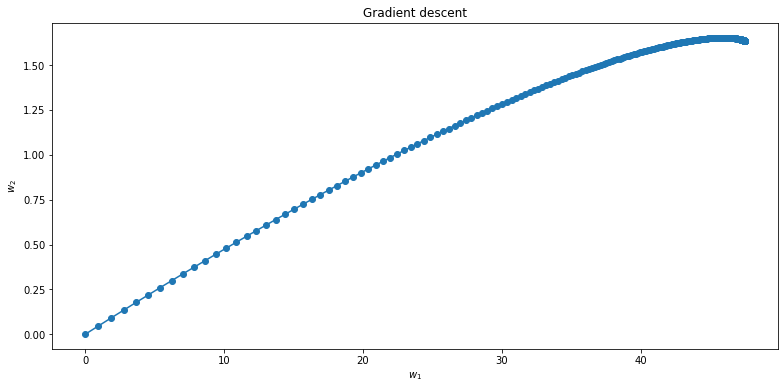

In [5]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.scatter(gdc_obj.w_list[:, 0], gdc_obj.w_list[:, 1])
plt.plot(gdc_obj.w_list[:, 0], gdc_obj.w_list[:, 1])
plt.show()

In [6]:
sgdc_obj = AlgorithmsDS(2, data, target)
sgdc_obj.stochastic_gradient_descent()

100 [[ 0.42033865]
 [-0.00108741]] 2223.22377472696
200 [[0.85549646]
 [0.01211311]] 2182.575750529317
300 [[1.32544576]
 [0.03076188]] 2139.08438619802
400 [[ 1.80475199]
 [-0.00578298]] 2095.4306469502767
500 [[2.04718635]
 [0.01216344]] 2073.362101287817
600 [[2.50150139]
 [0.06432132]] 2032.2442441532314
700 [[2.98430417]
 [0.05468408]] 1989.2870613933042
800 [[3.43367071]
 [0.13419585]] 1949.34553226541
900 [[3.97649213]
 [0.15440788]] 1901.962792570072
1000 [[4.35155751]
 [0.14897655]] 1869.6482811858743
1100 [[4.85537351]
 [0.1419562 ]] 1826.6825833387063
1200 [[5.24920005]
 [0.28566214]] 1792.855878323397
1300 [[5.59576585]
 [0.32516933]] 1763.6999668392814
1400 [[6.00078891]
 [0.34811045]] 1730.0206236068836
1500 [[6.29390772]
 [0.36304307]] 1705.8582765823267
1600 [[6.77412277]
 [0.41052087]] 1666.5639256761735
1700 [[7.16519622]
 [0.32951345]] 1635.3368213806498
1800 [[7.47470348]
 [0.30090283]] 1610.713455747453
1900 [[7.84376897]
 [0.35612209]] 1581.271861316412
2000 [[8.3

15900 [[37.40298771]
 [ 1.53845214]] 122.23770014549694
16000 [[37.48753069]
 [ 1.55662697]] 120.57057803120375
16100 [[37.58346762]
 [ 1.5526746 ]] 118.70762226318776
16200 [[37.69905833]
 [ 1.55076526]] 116.48616938453563
16300 [[37.80089059]
 [ 1.54005549]] 114.55549054855187
16400 [[37.88987209]
 [ 1.53667559]] 112.88266139230835
16500 [[37.97676079]
 [ 1.51557834]] 111.27342332548268
16600 [[38.07346298]
 [ 1.51801557]] 109.48713285748875
16700 [[38.17986014]
 [ 1.5092395 ]] 107.54931804216584
16800 [[38.25901919]
 [ 1.4997688 ]] 106.12394412375542
16900 [[38.37128537]
 [ 1.50491271]] 104.11392796702572
17000 [[38.45881512]
 [ 1.52175743]] 102.55780533774076
17100 [[38.54241557]
 [ 1.5170261 ]] 101.09649693499513
17200 [[38.61940818]
 [ 1.52619517]] 99.75635845221178
17300 [[38.70202538]
 [ 1.53596099]] 98.33176636640745
17400 [[38.7624402]
 [ 1.5365831]] 97.30175247145534
17500 [[38.83497505]
 [ 1.55372744]] 96.06755437403498
17600 [[38.9174384 ]
 [ 1.56417237]] 94.68152677123459

31700 [[45.24864795]
 [ 1.72282675]] 29.192555287479678
31800 [[45.27292675]
 [ 1.72082562]] 29.09570609862191
31900 [[45.2797948 ]
 [ 1.71600155]] 29.06820686958728
32000 [[45.30664105]
 [ 1.71257014]] 28.9628016882516
32100 [[45.33249264]
 [ 1.70499319]] 28.86245166863626
32200 [[45.35273919]
 [ 1.69939696]] 28.784878576453252
32300 [[45.36177846]
 [ 1.6989884 ]] 28.75060408173048
32400 [[45.38830572]
 [ 1.69696583]] 28.65093467699965
32500 [[45.40270197]
 [ 1.69149537]] 28.597309936131985
32600 [[45.42635165]
 [ 1.69155087]] 28.510383394842314
32700 [[45.44563171]
 [ 1.68085712]] 28.44018441961333
32800 [[45.46461335]
 [ 1.68255162]] 28.371961391675146
32900 [[45.48445937]
 [ 1.68456189]] 28.301413138851036
33000 [[45.51397686]
 [ 1.68465019]] 28.197912816955107
33100 [[45.54069078]
 [ 1.68047773]] 28.105701699843372
33200 [[45.54933977]
 [ 1.68021583]] 28.07616419425473
33300 [[45.57841901]
 [ 1.6725412 ]] 27.97796605529704
33400 [[45.59527342]
 [ 1.6773077 ]] 27.92179791730888
335

47500 [[46.85436548]
 [ 1.64297381]] 25.333831689759904
47600 [[46.85504311]
 [ 1.64591973]] 25.333198313270476
47700 [[46.86603694]
 [ 1.6421718 ]] 25.324691245929433
47800 [[46.87261346]
 [ 1.64031795]] 25.319714754050576
47900 [[46.88337057]
 [ 1.65167708]] 25.311329040041542
48000 [[46.88896821]
 [ 1.65126736]] 25.30723061464677
48100 [[46.89391408]
 [ 1.64657489]] 25.303757749004017
48200 [[46.89767192]
 [ 1.65607302]] 25.30091297473617
48300 [[46.89787981]
 [ 1.64485738]] 25.300974190778646
48400 [[46.90133229]
 [ 1.64682389]] 25.298479665535154
48500 [[46.9105414]
 [ 1.6359787]] 25.292483545351548
48600 [[46.91695107]
 [ 1.64275626]] 25.287860316394866
48700 [[46.91976966]
 [ 1.65591669]] 25.285706732619232
48800 [[46.92094234]
 [ 1.65469753]] 25.284937158036577
48900 [[46.92372334]
 [ 1.6566459 ]] 25.28308424939945
49000 [[46.92496802]
 [ 1.65933865]] 25.2822588961592
49100 [[46.92444546]
 [ 1.66262656]] 25.28261198127554
49200 [[46.9174951 ]
 [ 1.65728557]] 25.287218980178405


63300 [[47.17898321]
 [ 1.64908145]] 25.18028781693524
63400 [[47.17459187]
 [ 1.64715191]] 25.180987385868384
63500 [[47.18987739]
 [ 1.65382176]] 25.17875308493859
63600 [[47.18501855]
 [ 1.64661019]] 25.179472405827067
63700 [[47.19353382]
 [ 1.65139105]] 25.17832209518762
63800 [[47.19650648]
 [ 1.6489617 ]] 25.178005838010705
63900 [[47.19996601]
 [ 1.65561584]] 25.17758040015851
64000 [[47.20334012]
 [ 1.65384642]] 25.17723886438599
64100 [[47.21195538]
 [ 1.66384342]] 25.176523476232983
64200 [[47.21546724]
 [ 1.66116817]] 25.176212764455496
64300 [[47.20713956]
 [ 1.66304383]] 25.17692690049395
64400 [[47.21735286]
 [ 1.65866163]] 25.1760541319506
64500 [[47.21886439]
 [ 1.6433034 ]] 25.17609075112036
64600 [[47.22444723]
 [ 1.64514769]] 25.17569935741575
64700 [[47.2134389 ]
 [ 1.64984274]] 25.176371558885027
64800 [[47.2123651 ]
 [ 1.64286576]] 25.1765874626236
64900 [[47.21418846]
 [ 1.64406555]] 25.176413423258712
65000 [[47.20965909]
 [ 1.65142722]] 25.176668042884195
6510

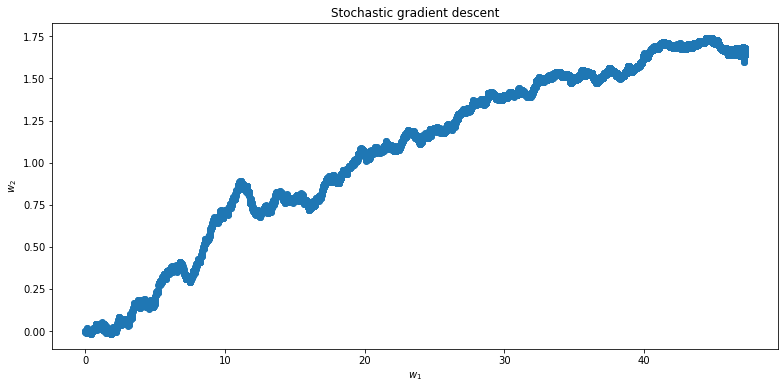

In [7]:
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.scatter(sgdc_obj.w_list[:, 0], sgdc_obj.w_list[:, 1])
plt.show()

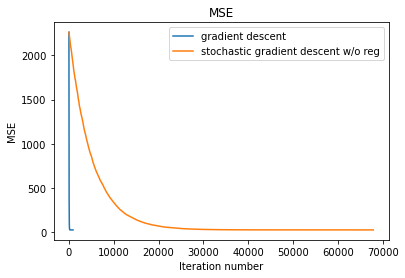

In [8]:
plt.plot(range(len(gdc_obj.errors)), gdc_obj.errors, label='gradient descent')
plt.plot(range(len(sgdc_obj.errors)), sgdc_obj.errors, label='stochastic gradient descent w/o reg')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()